In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils

In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session = fastf1.get_session(2025, 'Australian Grand Prix', 'FP2')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




req         WARNING 	DEFAULT CACHE ENABLED! (2.89 GB) /Users/PietroPaolo/Library/Caches/fastf1


core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 87
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 87)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 

In [3]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:19:13.852000,VER,1,0 days 00:01:18.510000,2.0,1.0,NaT,NaT,0 days 00:00:27.458000,0 days 00:00:17.615000,...,True,Red Bull Racing,0 days 00:17:55.342000,2025-03-14 05:02:55.792,1,NaN,False,,False,True
2,0 days 00:21:35.253000,VER,1,0 days 00:02:21.401000,3.0,1.0,NaT,NaT,0 days 00:00:49.781000,0 days 00:00:37.938000,...,True,Red Bull Racing,0 days 00:19:13.852000,2025-03-14 05:04:14.302,1,NaN,False,,False,True
3,0 days 00:22:53.146000,VER,1,0 days 00:01:17.893000,4.0,1.0,NaT,NaT,0 days 00:00:27.102000,0 days 00:00:17.517000,...,True,Red Bull Racing,0 days 00:21:35.253000,2025-03-14 05:06:35.703,1,NaN,False,,False,True
6,0 days 00:44:58.728000,VER,1,0 days 00:01:59.702000,7.0,2.0,NaT,NaT,0 days 00:00:34.022000,0 days 00:00:32.504000,...,True,Red Bull Racing,0 days 00:42:59.026000,2025-03-14 05:27:59.476,1,NaN,False,,False,True
7,0 days 00:46:16.205000,VER,1,0 days 00:01:17.477000,8.0,2.0,NaT,NaT,0 days 00:00:27.027000,0 days 00:00:17.456000,...,True,Red Bull Racing,0 days 00:44:58.728000,2025-03-14 05:29:59.178,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0 days 01:08:51.097000,PIA,81,0 days 00:01:22.004000,23.0,3.0,NaT,NaT,0 days 00:00:28.397000,0 days 00:00:18.316000,...,False,McLaren,0 days 01:07:29.093000,2025-03-14 05:52:29.543,1,NaN,False,,False,True
545,0 days 01:10:12.961000,PIA,81,0 days 00:01:21.864000,24.0,3.0,NaT,NaT,0 days 00:00:28.331000,0 days 00:00:18.275000,...,False,McLaren,0 days 01:08:51.097000,2025-03-14 05:53:51.547,1,NaN,False,,False,True
546,0 days 01:11:35.163000,PIA,81,0 days 00:01:22.202000,25.0,3.0,NaT,NaT,0 days 00:00:28.477000,0 days 00:00:18.230000,...,False,McLaren,0 days 01:10:12.961000,2025-03-14 05:55:13.411,1,NaN,False,,False,True
547,0 days 01:12:57.309000,PIA,81,0 days 00:01:22.146000,26.0,3.0,NaT,NaT,0 days 00:00:28.535000,0 days 00:00:18.162000,...,False,McLaren,0 days 01:11:35.163000,2025-03-14 05:56:35.613,1,NaN,False,,False,True


In [4]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [6]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input ' bulls' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [7]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "LAW": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "DOO": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "TSU": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [8]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

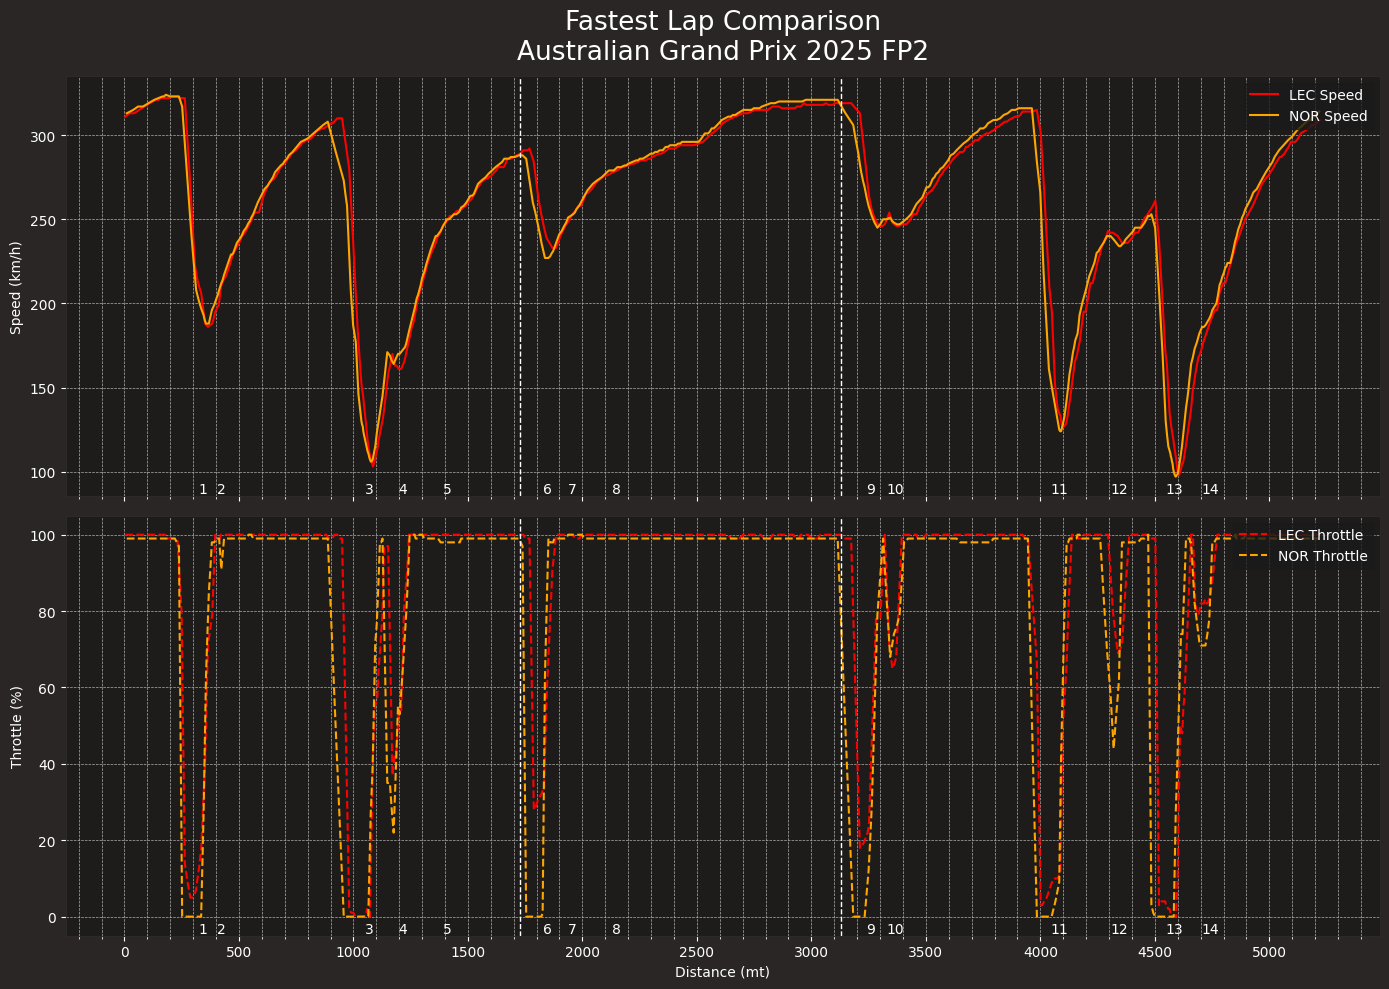

In [9]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP = transformed_laps.pick_drivers('LEC').pick_fastest()
NOR_FASTEST_LAP = transformed_laps.pick_drivers('NOR').pick_fastest()
#VER_FASTEST_LAP = transformed_laps.pick_drivers('VER').pick_fastest()

# Get telemetry data and add distance
LEC_tel = LEC_FASTEST_LAP.get_car_data().add_distance()
NOR_tel = NOR_FASTEST_LAP.get_car_data().add_distance()
#VER_tel = VER_FASTEST_LAP.get_car_data().add_distance()

#interpolating
LEC_tel = interpolate_dataframe(LEC_tel)
#VER_tel = interpolate_dataframe(VER_tel)
NOR_tel = interpolate_dataframe(NOR_tel)
# Length of the track
length_circuit = LEC_tel['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel[LEC_tel['Time'] <= LEC_FASTEST_LAP['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel[LEC_tel['Time'] <= (LEC_FASTEST_LAP['Sector1Time'] + LEC_FASTEST_LAP['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel['Distance'], LEC_tel['Speed'], color='red', label='LEC Speed')
#ax1.plot(VER_tel['Distance'], VER_tel['Speed'], color='blue', label='VER Speed')
ax1.plot(NOR_tel['Distance'], NOR_tel['Speed'], color='orange', label='NOR Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} FP2", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(LEC_tel['Distance'], LEC_tel['Throttle'], color='red', linestyle='--', label='LEC Throttle')
#ax2.plot(VER_tel['Distance'], VER_tel['Throttle'], color='blue', linestyle='--', label='VER Throttle')
ax2.plot(NOR_tel['Distance'], NOR_tel['Throttle'], color='orange', linestyle='--', label='NOR Throttle')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Adjust layout
plt.tight_layout()
plt.show()


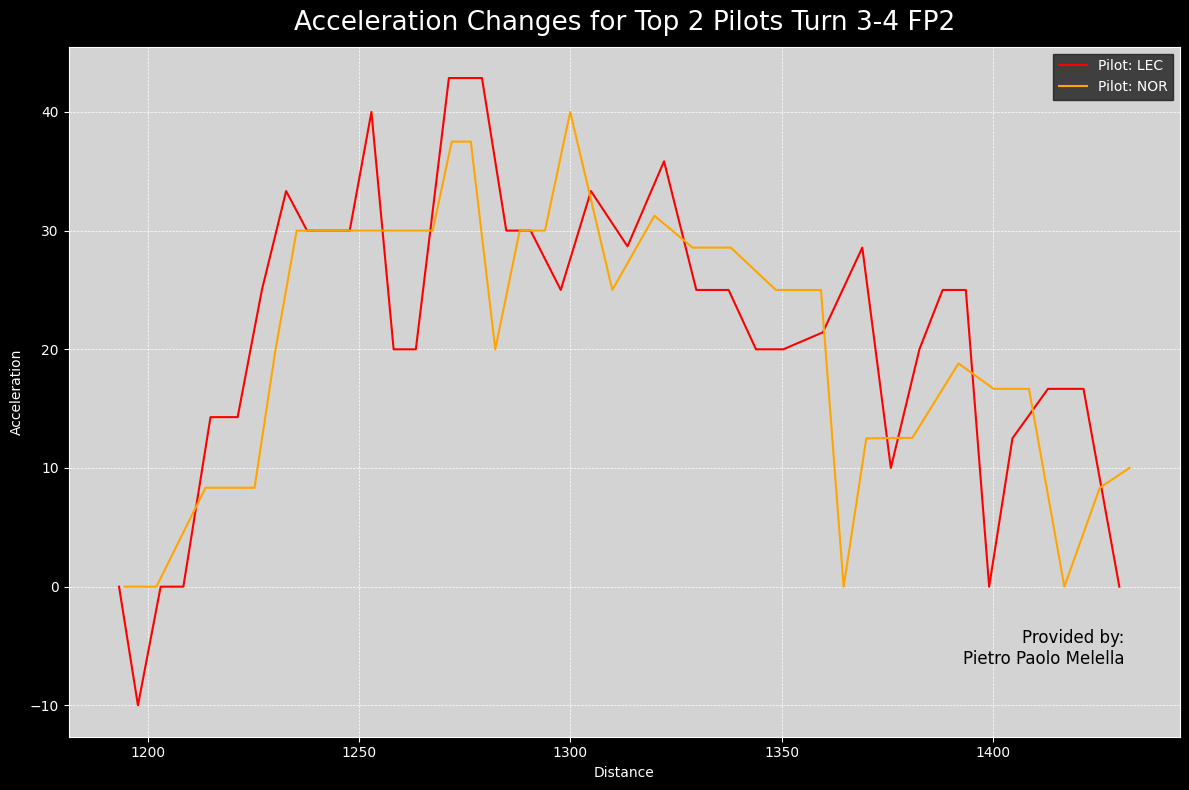

In [10]:
drivers_4= ['LEC', 'NOR']

# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()

    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    
    # Selecting the data starting for turn 6
    pilot_car_data_turn_6 = pilot_car_data[
        (pilot_car_data['Distance'] > (corner_distances[3]-25)) & 
        (pilot_car_data['Distance'] < corner_distances[4]+25)
    ].copy()  # Ensure it's a copy to avoid SettingWithCopyWarning

    # Calculate acceleration
    pilot_car_data_turn_6.loc[:, 'Acceleration'] = (
        (pilot_car_data_turn_6['Speed'].diff().fillna(0)) /
        pilot_car_data_turn_6['SessionTime'].dt.total_seconds().diff().fillna(0)
    ).fillna(0)

    # Filter rows where throttle is less than 101 and reset index
    pilot_car_data_turn_6_throttle_99 = pilot_car_data_turn_6[
        pilot_car_data_turn_6['Throttle'] < 101
    ].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_turn_6_throttle_99['Distance'], 
             pilot_car_data_turn_6_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 2 Pilots Turn 3-4 FP2')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

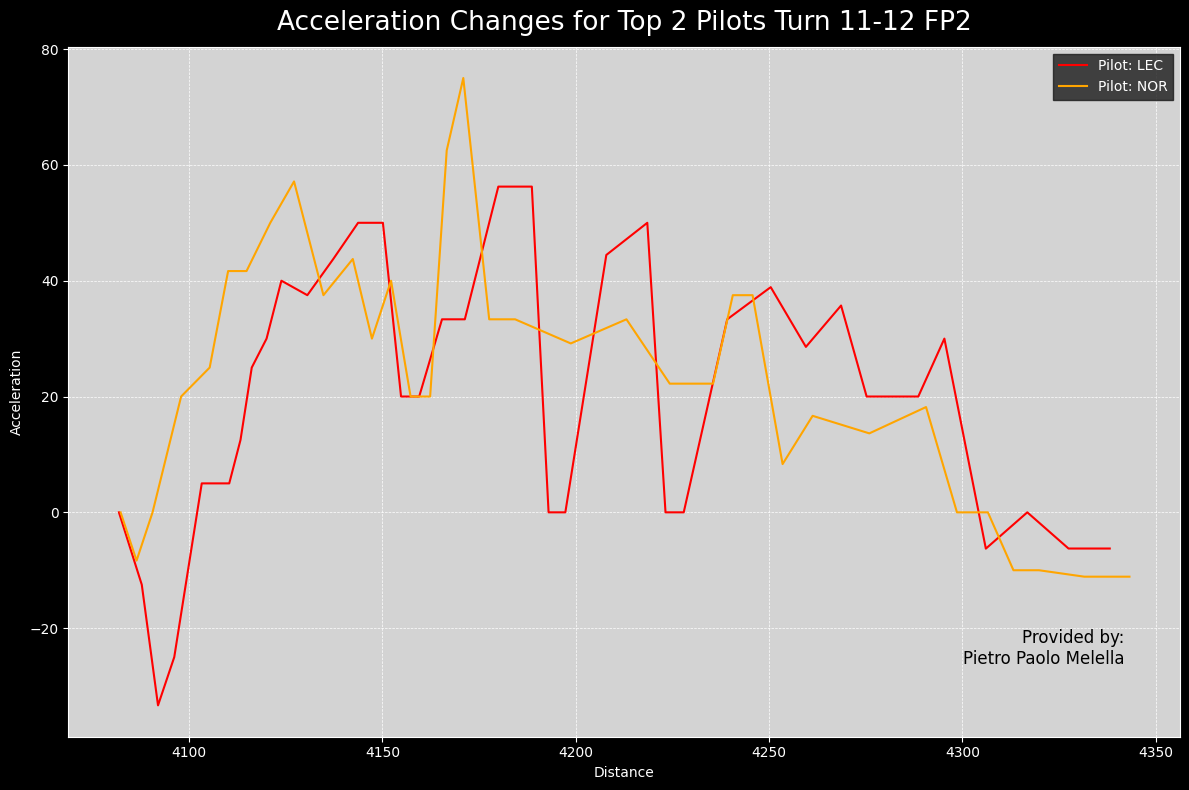

In [11]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()

    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    
    # Selecting the data starting for turn 6
    pilot_car_data_turn_6 = pilot_car_data[
        (pilot_car_data['Distance'] > (corner_distances[10])) & 
        (pilot_car_data['Distance'] < corner_distances[11])
    ].copy()  # Ensure it's a copy to avoid SettingWithCopyWarning

    # Calculate acceleration
    pilot_car_data_turn_6.loc[:, 'Acceleration'] = (
        (pilot_car_data_turn_6['Speed'].diff().fillna(0)) /
        pilot_car_data_turn_6['SessionTime'].dt.total_seconds().diff().fillna(0)
    ).fillna(0)

    # Filter rows where throttle is less than 101 and reset index
    pilot_car_data_turn_6_throttle_99 = pilot_car_data_turn_6[
        pilot_car_data_turn_6['Throttle'] < 101
    ].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_turn_6_throttle_99['Distance'], 
             pilot_car_data_turn_6_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 2 Pilots Turn 11-12 FP2')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

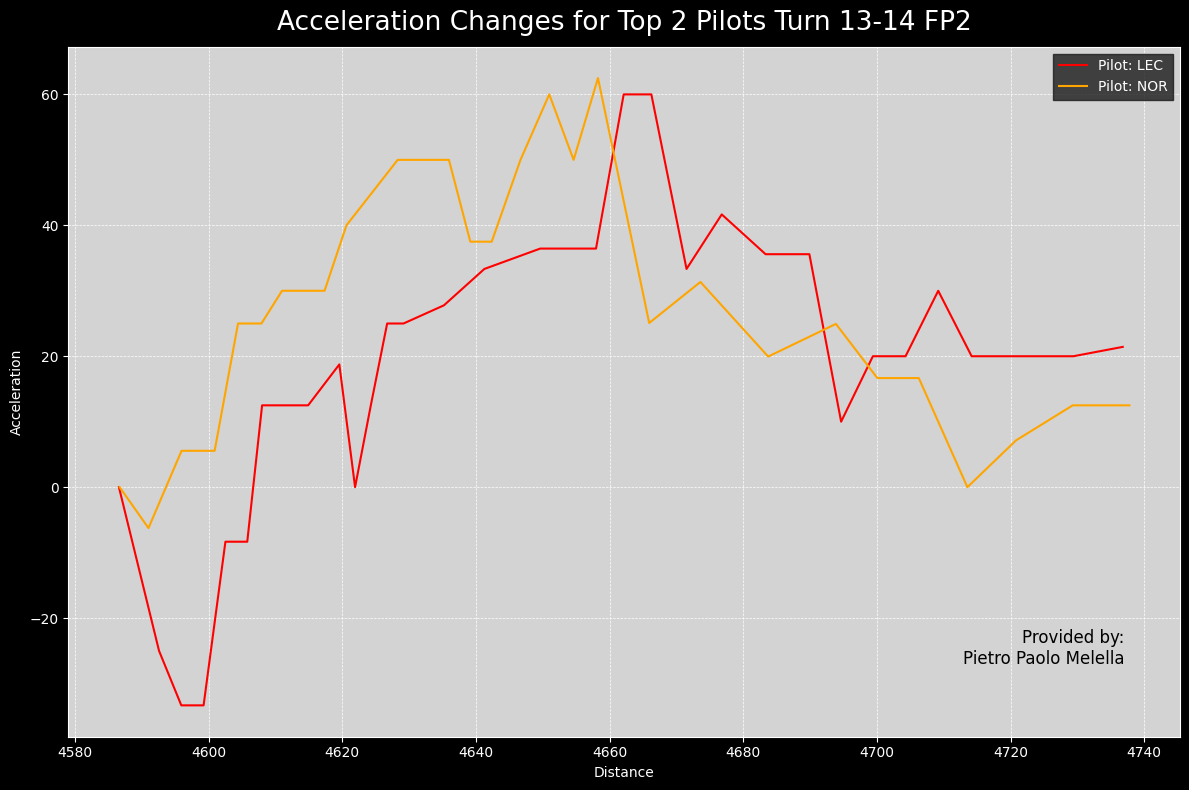

In [12]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()

    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    
    # Selecting the data starting for turn 6
    pilot_car_data_turn_6 = pilot_car_data[
        (pilot_car_data['Distance'] > (corner_distances[12])) & 
        (pilot_car_data['Distance'] < corner_distances[13])
    ].copy()  # Ensure it's a copy to avoid SettingWithCopyWarning

    # Calculate acceleration
    pilot_car_data_turn_6.loc[:, 'Acceleration'] = (
        (pilot_car_data_turn_6['Speed'].diff().fillna(0)) /
        pilot_car_data_turn_6['SessionTime'].dt.total_seconds().diff().fillna(0)
    ).fillna(0)

    # Filter rows where throttle is less than 101 and reset index
    pilot_car_data_turn_6_throttle_99 = pilot_car_data_turn_6[
        pilot_car_data_turn_6['Throttle'] < 101
    ].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_turn_6_throttle_99['Distance'], 
             pilot_car_data_turn_6_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 2 Pilots Turn 13-14 FP2')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [18]:
import os
os.chdir('/Users/PietroPaolo/Desktop/GitHub/F1/')
print("Current directory:", os.getcwd())  # Should now print `/Users/PietroPaolo/Desktop/GitHub/F1/`

Current directory: /Users/PietroPaolo/Desktop/GitHub/F1


In [19]:
import sys
import import_ipynb

# Add the parent directory to the Python module search path
sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')

# Import the RacePaceAnalyzer class from the notebook
from model_prediction_race_pace import RacePaceAnalyzer

core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Usi

Transformed laps for Bahrain Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 38
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 38)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 21 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '38', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req   

Transformed laps for Saudi Arabian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Japanese Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req           

Transformed laps for Australian Grand Prix FP2 loaded successfully.


core        WARNING 	No lap data for driver 63
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 1)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 10)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 11)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 14)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 2)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 63)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core       

Transformed laps for Japanese Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Canadian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for tr

Transformed laps for Emilia Romagna Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Canadian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for British Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Spanish Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Hungarian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Transformed laps for British Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Belgian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Transformed laps for Hungarian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Dutch Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Transformed laps for Belgian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for tra

Transformed laps for Dutch Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Singapore Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Italian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']
events      WARNING 	Correcting user input 'Mexican Grand Prix' to 'Mexico City Grand Prix'
core           INFO 	Loading data for Mexico City Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Transformed laps for Singapore Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Las Vegas Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req        

Transformed laps for Mexican Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Transformed laps for Las Vegas Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '4', '43', '44', '55', '61', '63', '77', '81']


Transformed laps for Abu Dhabi Grand Prix FP2 loaded successfully.
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.92      1.00      0.96        36

    accuracy                           0.95        60
   macro avg       0.96      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60

Model saved to race_pace_model.pkl and scaler to race_pace_scaler.pkl


In [20]:
# Example: Analyze event data
# Initialize the analyzer
analyzer = RacePaceAnalyzer()

# Load the saved model and scaler
analyzer.load_model(
    model_path='/Users/PietroPaolo/Desktop/GitHub/F1/race_pace_model.pkl',
    scaler_path='/Users/PietroPaolo/Desktop/GitHub/F1/race_pace_scaler.pkl'
)

race_pace_laps = analyzer.get_race_pace_laps(transformed_laps)


Model and scaler loaded successfully.


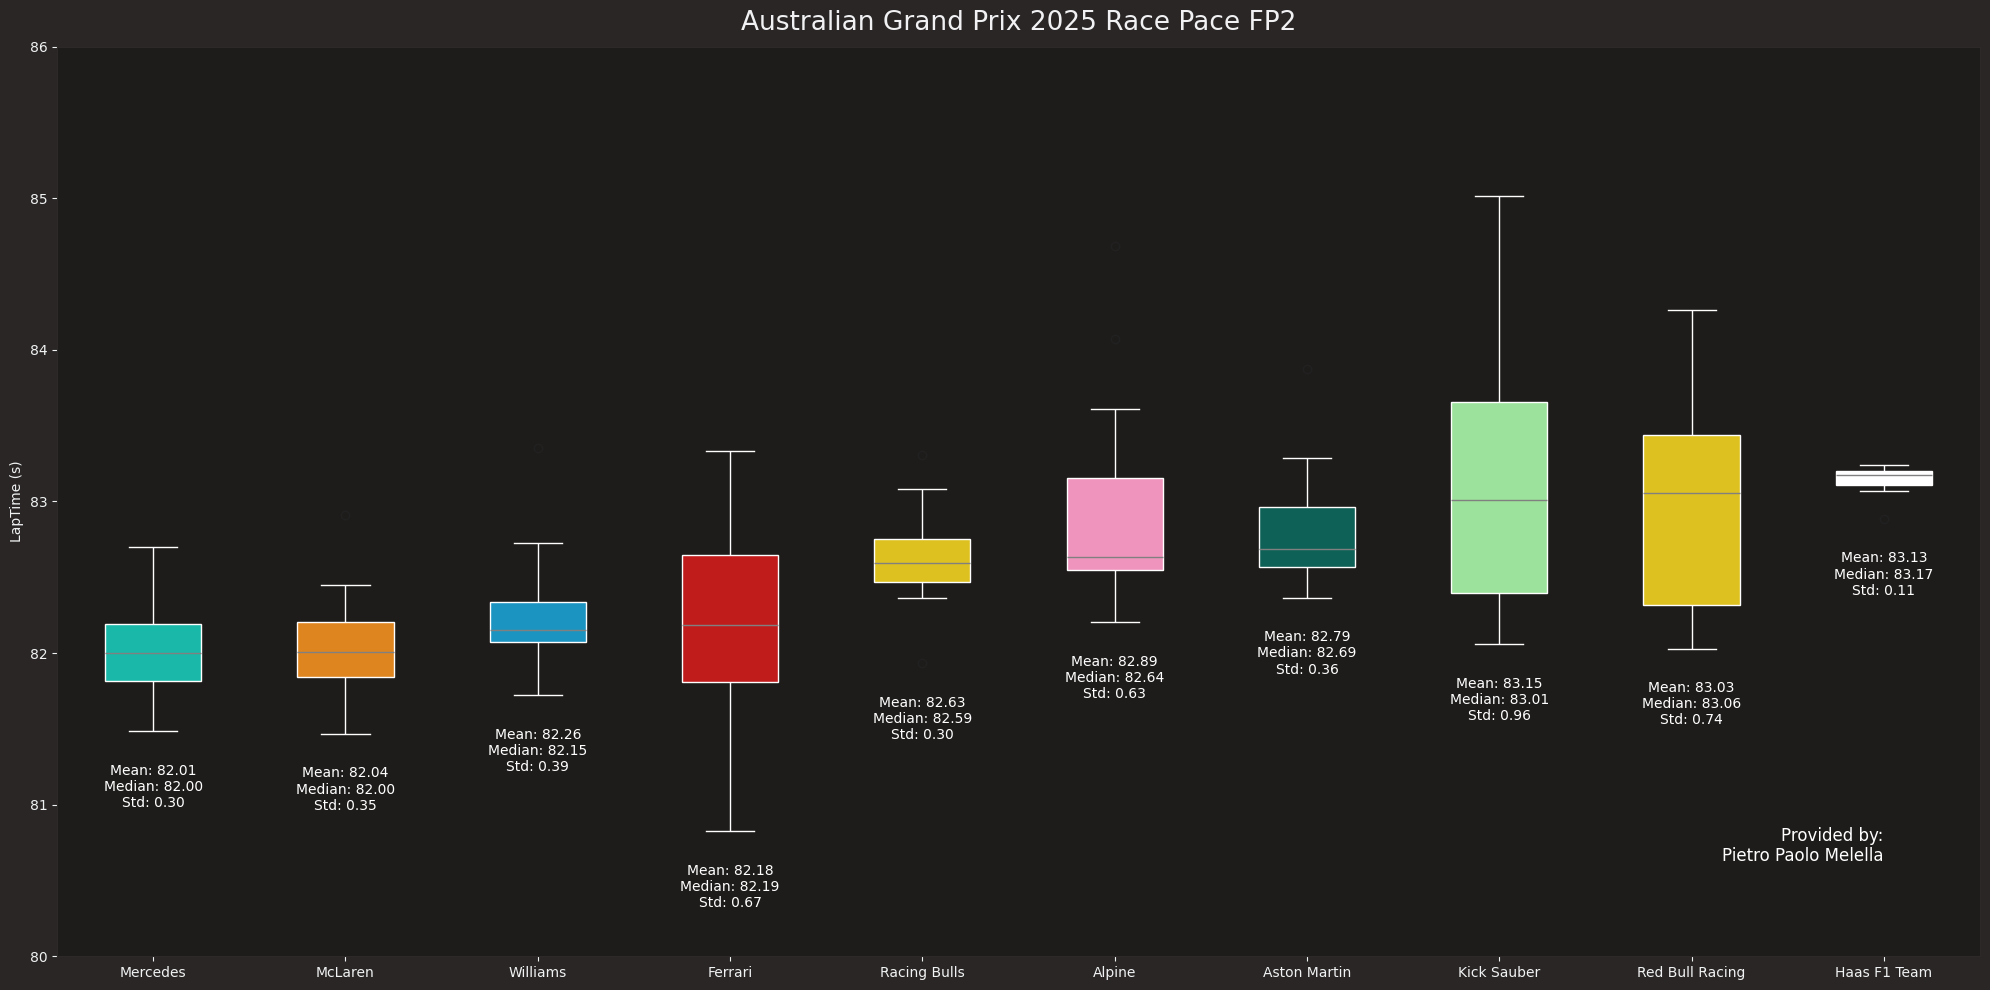

In [31]:
# First, calculate the mean and median times for each team
race_pace_laps.reset_index(drop=True, inplace=True)

team_stats = race_pace_laps.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

team_order = team_stats['median'].sort_values().index

# Create the boxplot
fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
box_plot = sns.boxplot(
    data=race_pace_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

# Loop through the teams and add mean, median, and std text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker
    
    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']
    std_time = race_pace_laps[race_pace_laps['Team'] == team]['LapTime (s)'].std()  # Calculate std
    
    # Place the text below the whisker (min value in this case)
    ax.text(
        i, whisker_position - 0.5,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}\nStd: {std_time:.2f}', 
        horizontalalignment='center', color='white', fontsize=10
    )

# Add the title and grid properties
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace FP2")
plt.grid(visible=False)

# Add credit text
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Remove the x-label
ax.set(xlabel=None)
# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(80, 86)  # Example range, adjust based on your data

plt.tight_layout()
plt.show()

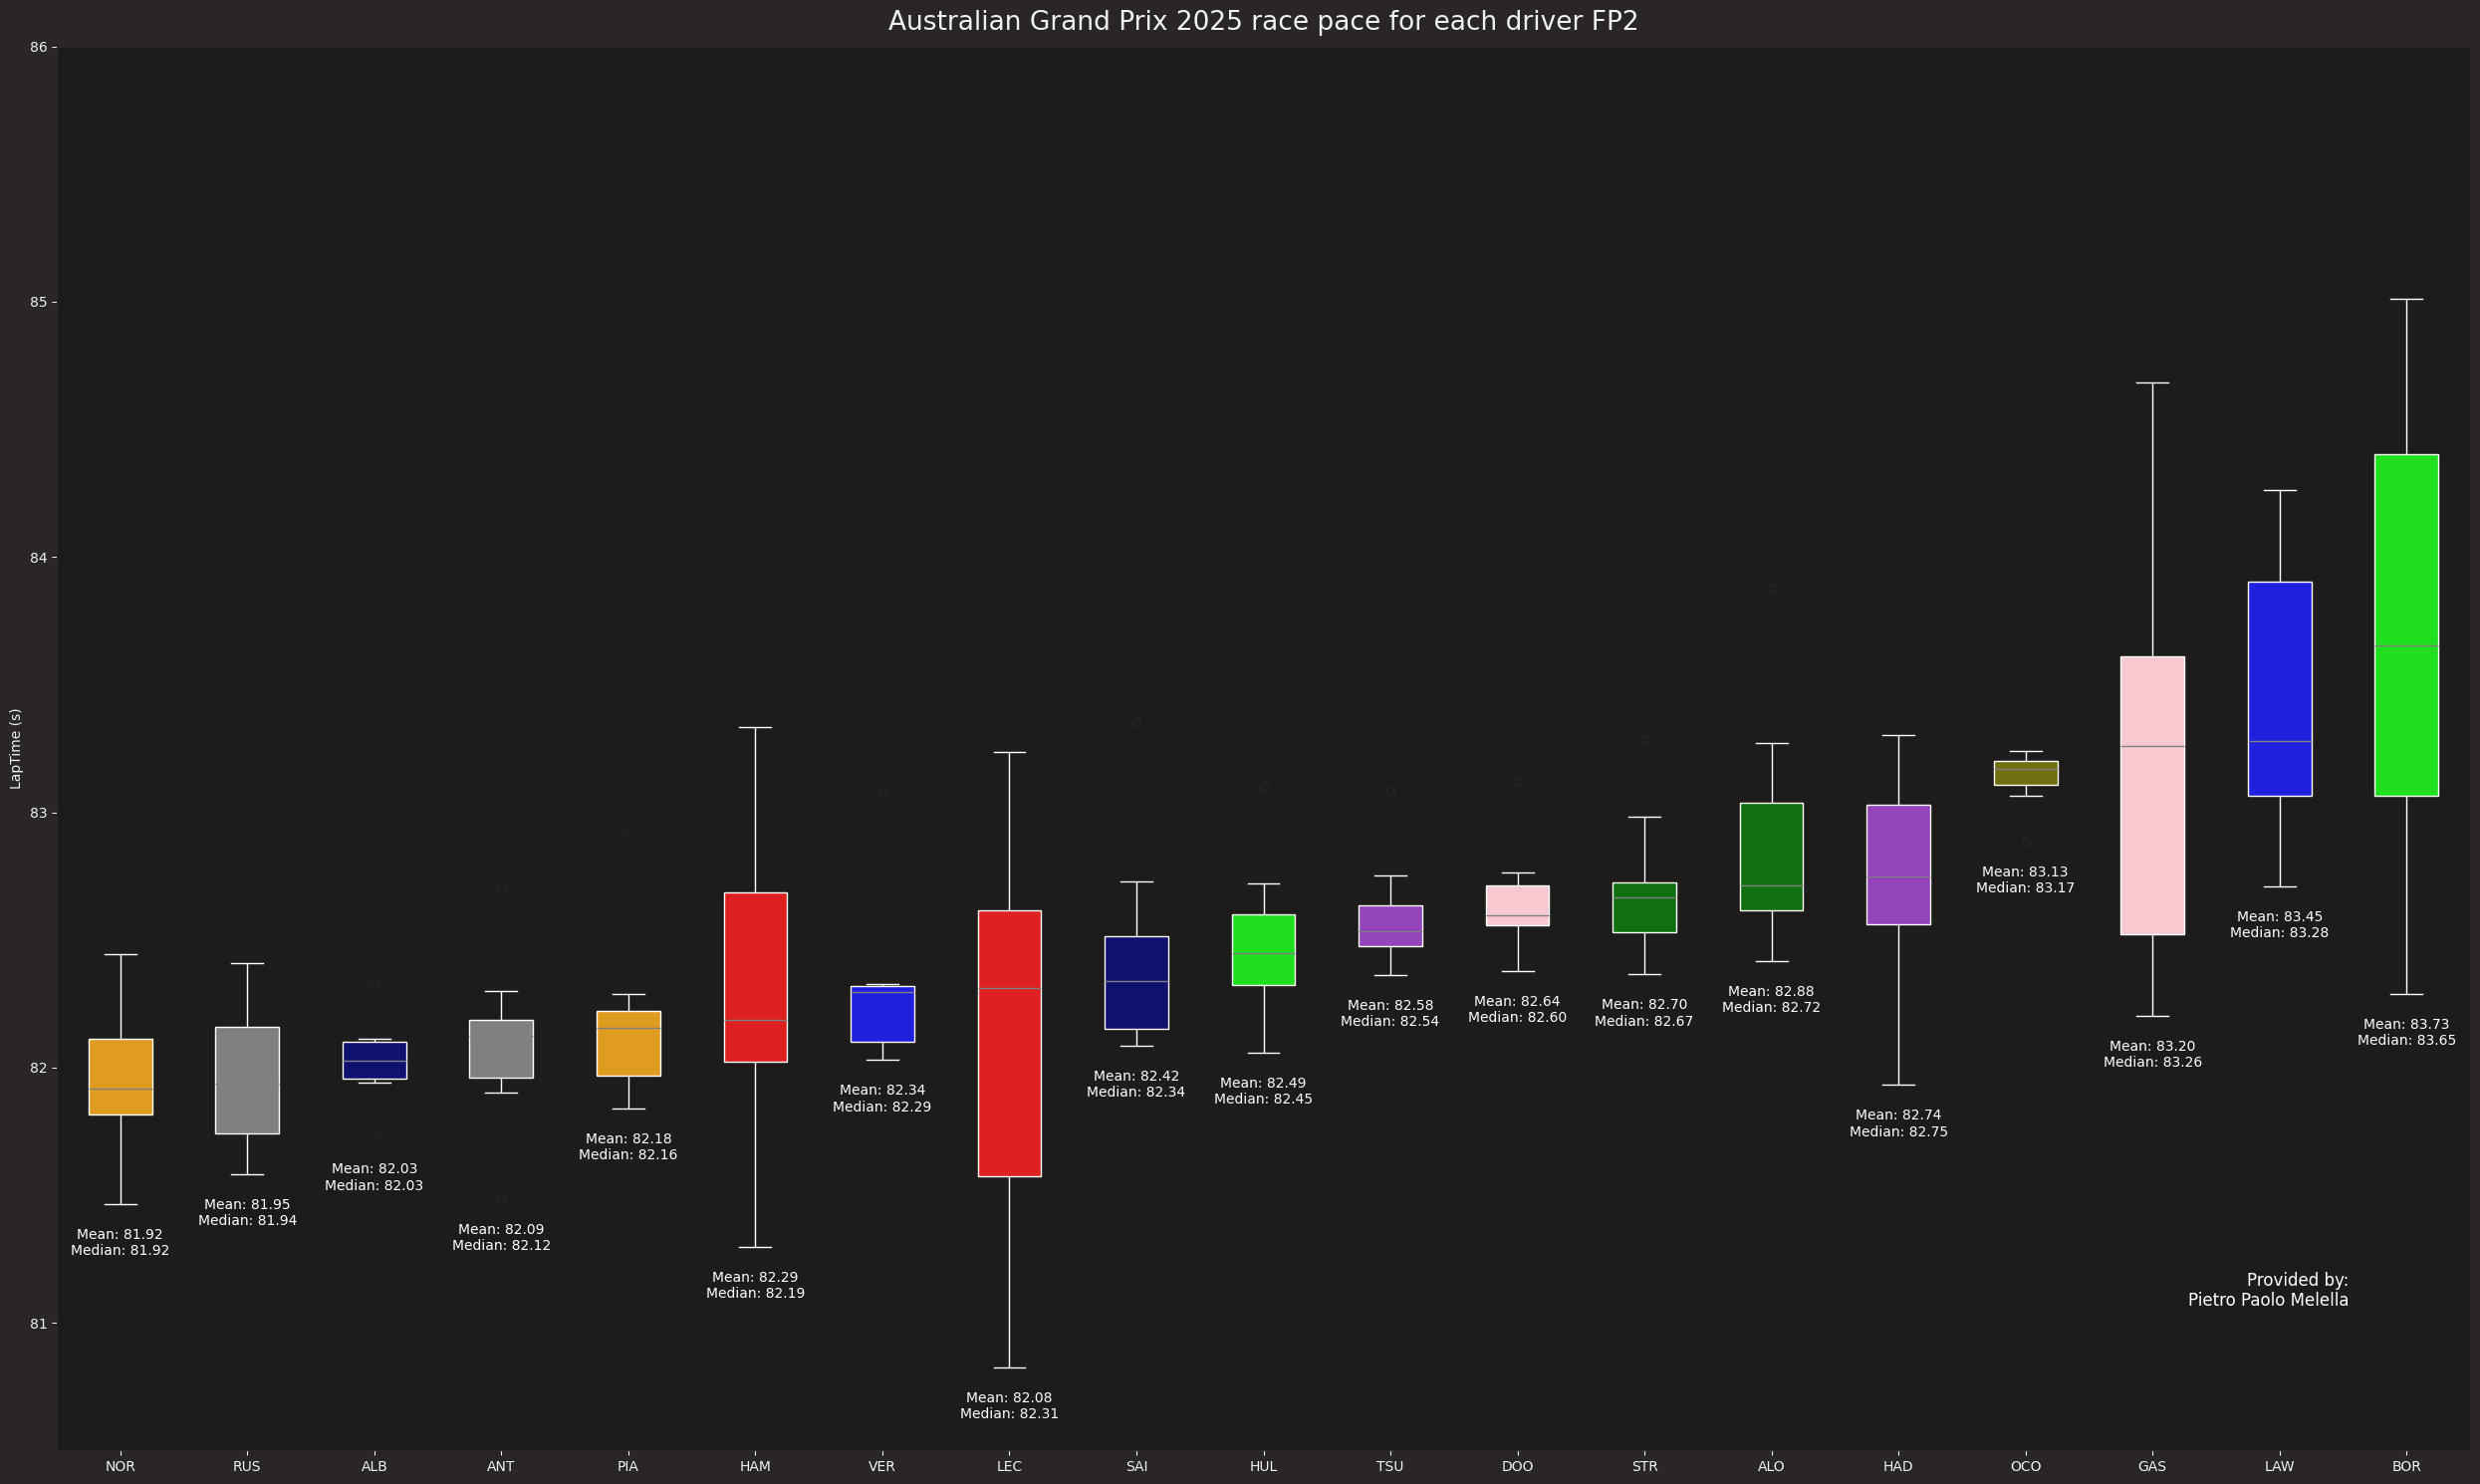

In [28]:
drivers_stats = race_pace_laps.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

median_lap_times = drivers_stats['median']

# Sort the drivers based on the median lap times
sorted_drivers = median_lap_times.sort_values().index

fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=race_pace_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend to avoid redundancy
)

# Loop through the teams and add mean and median text under each whisker
for i, drivers in enumerate(sorted_drivers):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[drivers, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = drivers_stats.loc[drivers, 'mean']
    median_time = drivers_stats.loc[drivers, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.2,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )

plt.title(f"{session.event['EventName']} {session.event.year} race pace for each driver FP2")
plt.grid(visible=False)

plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# x-label is redundant
ax.set(xlabel=None)
ax.set_ylim(80.5,86)
plt.tight_layout()
plt.show()

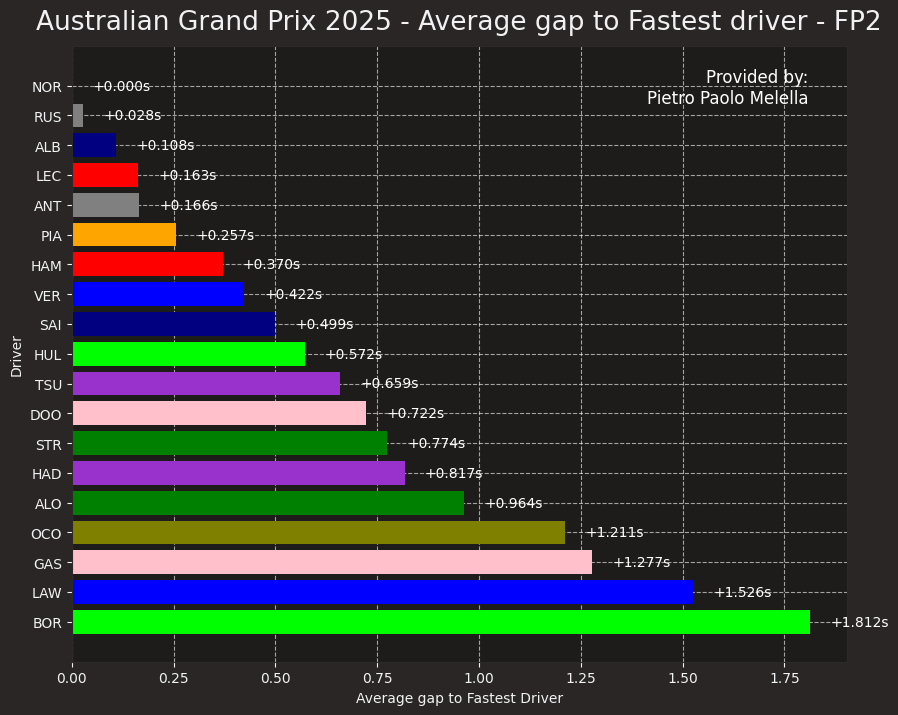

In [32]:
mean_lap_times = race_pace_laps.groupby('Driver')['LapTime (s)'].mean()

# Find the fastest lap time
fastest_lap_time = mean_lap_times.min()

# Compute the gap from the fastest lap time for each driver
gap_from_fastest = mean_lap_times - fastest_lap_time

# Sort the gap_from_fastest for better visualization (fastest to slowest)
gap_from_fastest = gap_from_fastest.sort_values(ascending=True)


# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(gap_from_fastest.index, gap_from_fastest.values, color=[colors[driver] for driver in gap_from_fastest.index])
plt.xlabel("Average gap to Fastest Driver")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver - FP2")

# Add mean lap times as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s', 
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the fastest on top
plt.show()

In [34]:
display(race_pace_laps.pick_drivers('LEC'))

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s),LapTimeDifference,Consistency,is_race_pace
70,0 days 00:29:35.013000,LEC,16,0 days 00:01:20.989000,7.0,2.0,NaT,NaT,0 days 00:00:26.874000,0 days 00:00:17.586000,...,1,NaN,False,,False,True,80.989,4.101,0,1
71,0 days 00:59:46.393000,LEC,16,0 days 00:01:23.237000,18.0,5.0,NaT,NaT,0 days 00:00:28.746000,0 days 00:00:18.780000,...,1,NaN,False,,False,True,83.237,0.682,0,1
72,0 days 01:01:08.948000,LEC,16,0 days 00:01:22.555000,19.0,5.0,NaT,NaT,0 days 00:00:28.455000,0 days 00:00:18.544000,...,1,NaN,False,,False,True,82.555,0.098,0,1
73,0 days 01:02:31.405000,LEC,16,0 days 00:01:22.457000,20.0,5.0,NaT,NaT,0 days 00:00:28.433000,0 days 00:00:18.484000,...,1,NaN,False,,False,True,82.457,0.157,1,1
74,0 days 01:03:54.019000,LEC,16,0 days 00:01:22.614000,21.0,5.0,NaT,NaT,0 days 00:00:28.618000,0 days 00:00:18.482000,...,1,NaN,False,,False,True,82.614,0.447,1,1
75,0 days 01:05:16.186000,LEC,16,0 days 00:01:22.167000,22.0,5.0,NaT,NaT,0 days 00:00:28.574000,0 days 00:00:18.397000,...,1,NaN,False,,False,True,82.167,0.396,1,1
76,0 days 01:06:37.957000,LEC,16,0 days 00:01:21.771000,23.0,5.0,NaT,NaT,0 days 00:00:28.506000,0 days 00:00:18.318000,...,1,NaN,False,,False,True,81.771,0.076,1,1
77,0 days 01:07:59.652000,LEC,16,0 days 00:01:21.695000,24.0,5.0,NaT,NaT,0 days 00:00:28.508000,0 days 00:00:18.270000,...,1,NaN,False,,False,True,81.695,0.488,1,1
78,0 days 01:09:20.859000,LEC,16,0 days 00:01:21.207000,25.0,5.0,NaT,NaT,0 days 00:00:28.402000,0 days 00:00:17.979000,...,1,NaN,False,,False,True,81.207,1.411,1,1
79,0 days 01:10:43.477000,LEC,16,0 days 00:01:22.618000,26.0,5.0,NaT,NaT,0 days 00:00:28.342000,0 days 00:00:17.958000,...,1,NaN,False,,False,True,82.618,0.255,0,1
